# Creating df_lyrics and new features

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('Funciones.py','wb').write(src)
import Funciones

Saving Limpieza.py to Limpieza.py


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from Funciones import limpieza
from Funciones import word_token_sinstop
from Funciones import word_token
from Funciones import riqueza_lexica
! pip install pysentimiento
! pip install pydantic
from pysentimiento import create_analyzer
from tqdm import tqdm
tqdm.pandas()
! pip install transformers
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from collections import Counter


In [ ]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/df_songs_resampled_7637.csv')

In [ ]:
df = pd.read_csv('df_songs_resampled_7637.csv')

In [ ]:
df['clean_lyrics']=df.lyrics.apply(lambda x: limpieza(x))

In [ ]:
df_lyrics = pd.DataFrame(data = df.clean_lyrics)

In [ ]:
df_lyrics.head()

,clean_lyrics
0,for sure playboy nigga cant out stunt when com...
1,you you only one you number one you one one wa...
2,huh frikki frikki frikki ten bands twenty ban...
3,light the night calm the fight dont wanna live...
4,tay keith fuck these niggas yeah the wizrd woo...


# Trying sentiment analysis with pysentimiento for analyzing results - May be executed in collab T4 GPU

In [ ]:
from google.colab import drive
! pip install pysentimiento
! pip install pydantic
from pysentimiento import create_analyzer
from tqdm import tqdm
tqdm.pandas()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=73bcb19d2e109f97d2ca66b6604a8e85a92c46271b176b79914846dca9d54580
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/df_lyrics.csv')
df= df_lyrics

In [ ]:
def get_sentiment(text):
  try:
    r = analyzer.predict(text).output
  except:
    r = 'no_analizado'

  return r

In [ ]:
analyzer = create_analyzer(task="sentiment", lang="en")
df['sentimiento_clasif'] = df['clean_lyrics'].progress_map(lambda x: get_sentiment(x))

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

100%|██████████| 7637/7637 [02:21<00:00, 53.85it/s]


In [ ]:
analyzer = create_analyzer(task="emotion", lang="en")
df['emotion_clasif'] = df['clean_lyrics'].progress_map(lambda x: get_sentiment(x))

config.json:   0%|          | 0.00/999 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

100%|██████████| 7637/7637 [02:08<00:00, 59.59it/s]


In [ ]:
analyzer = create_analyzer(task="irony", lang="en")
df['irony_clasif'] = df['clean_lyrics'].progress_map(lambda x: get_sentiment(x))

config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

100%|██████████| 7637/7637 [01:59<00:00, 63.81it/s]


In [ ]:
print(df['sentimiento_clasif'].value_counts())
print(df['emotion_clasif'].value_counts())
df['irony_clasif'].value_counts()

NEU    5168
NEG    1651
POS     818
Name: sentimiento_clasif, dtype: int64
others      5278
disgust     1427
anger        760
sadness      118
joy           33
fear          17
surprise       4
Name: emotion_clasif, dtype: int64


not ironic    7631
ironic           6
Name: irony_clasif, dtype: int64

After seeing that:
- for emotion_classification most of the instancies are neutral
- for sentiment_classification most of the instancies are labelled as 'other'
- for irony_classification theres a huge unbalance

We conclude that this analysis wouldn't be of any help to our problem and we won't use it.

# Obtaining the len and lexical richness of each song (w and w/o stopwords), the 3 most common words, the 3 least common words and their respective sequences.

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
most_freq_words = []
less_freq_words = []
most_freq = []
less_freq = []
len_words = []
len_words_sinstop = []
riquezas = []
riquezas_sinstop = []
for cancion in df.clean_lyrics:
    cancion_tok = word_token(cancion)
    len_words.append(len(cancion_tok))
    riq_lex = riqueza_lexica(cancion_tok)
    riquezas.append(riq_lex)
    cancion_wt_sin_sw = word_token_sinstop(cancion)
    #palabras totales
    len_words_sinstop.append(len(cancion_wt_sin_sw))
    #riqueza léxica
    riq_lex_sinstop = riqueza_lexica(cancion_wt_sin_sw)
    riquezas_sinstop.append(riq_lex)
    freq = nltk.FreqDist(cancion_wt_sin_sw)
    most_frequent_words = [word for word, f in freq.most_common(3)]
    most_frequent_frequencies = [f for word, f in freq.most_common(3)]
    most_freq_words.append(most_frequent_words)
    most_freq.append(most_frequent_frequencies)
    # Retrieve the three least frequent words and frequencies separately
    least_frequent_words = [word for word, f in freq.most_common()[:-4:-1]]
    least_frequent_frequencies = [f for word, f in freq.most_common()[:-4:-1]]
    less_freq_words.append(least_frequent_words)
    less_freq.append(least_frequent_frequencies)

In [ ]:
def get_element(lst, index):
    try:
        return lst[index]
    except IndexError:
        return np.nan

In [ ]:
most1 = [get_element(cancion, 0) for cancion in most_freq_words]
most2 = [get_element(cancion, 1) for cancion in most_freq_words]
most3 = [get_element(cancion, 2) for cancion in most_freq_words]
most1_freq = [get_element(cancion, 0) for cancion in most_freq]
most2_freq = [get_element(cancion, 1) for cancion in most_freq]
most3_freq = [get_element(cancion, 2) for cancion in most_freq]
less1 = [get_element(cancion, 2) for cancion in less_freq_words]
less2 = [get_element(cancion, 1) for cancion in less_freq_words]
less3 = [get_element(cancion, 0) for cancion in less_freq_words]
less1_freq = [get_element(cancion, 2) for cancion in less_freq]
less2_freq = [get_element(cancion, 1) for cancion in less_freq]
less3_freq = [get_element(cancion, 0) for cancion in less_freq]

In [ ]:
df_lyrics['len_words'] = len_words_sinstop
df_lyrics['riq_lex'] = riquezas_sinstop
df_lyrics['most1'] = most1
df_lyrics['most1_freq'] = most1_freq
df_lyrics['most2'] = most2
df_lyrics['most2_freq'] = most2_freq
df_lyrics['most3'] = most3
df_lyrics['most3_freq'] = most3_freq
df_lyrics['less1'] = less1
df_lyrics['less1_freq'] = less1_freq
df_lyrics['less2'] = less2
df_lyrics['less2_freq'] = less2_freq
df_lyrics['less3'] = less3
df_lyrics['less3_freq'] = less3_freq

In [ ]:
df_lyrics['len_ws'] = len_words
df_lyrics['riq_lex_ws'] = riquezas

In [ ]:
df_lyrics.head()

,clean_lyrics,sentimiento_clasif,emotion_clasif,irony_clasif,len_words,riq_lex,most1,most1_freq,most2,most2_freq,most3,most3_freq,less1,less1_freq,less2,less2_freq,less3,less3_freq,len_ws,riq_lex_ws
0,for sure playboy nigga cant out stunt when com...,NEG,others,not ironic,544,0.344569,nigga,20,one,19.0,number,18.0,tvs,1.0,whole,1.0,hood,1,801,0.344569
1,you you only one you number one you one one wa...,NEU,others,not ironic,199,0.342767,one,51,wan,11.0,na,11.0,grind,1.0,bump,1.0,true,1,318,0.342767
2,huh frikki frikki frikki ten bands twenty ban...,NEU,others,not ironic,465,0.358521,huh,19,frikki,18.0,never,14.0,hoarder,1.0,ayy,1.0,ever,1,622,0.358521
3,light the night calm the fight dont wanna live...,POS,others,not ironic,106,0.430464,giving,12,love,11.0,imma,9.0,youll,1.0,reason,1.0,yeah,1,151,0.430464
4,tay keith fuck these niggas yeah the wizrd woo...,NEG,anger,not ironic,422,0.399610,got,19,hundred,16.0,shooters,15.0,parked,1.0,gon,1.0,walk,1,513,0.399610


# Obtaining data of the whole ensemble of lyrics for creating other features

In [ ]:
all_lyrics = ' '.join(df_lyrics['clean_lyrics'])

In [ ]:
all_lyrics = word_token_sinstop(all_lyrics)

In [ ]:
len(all_lyrics)

1421824

In [ ]:
len(set(all_lyrics))

36602

In [ ]:
len(set(all_lyrics))/len(all_lyrics)

0.025742989287000362

In [ ]:
#Obtaining the 20 most common words within all lyrics
freq = nltk.FreqDist(all_lyrics)
freq.most_common(20)

[('like', 20911),
 ('yeah', 19227),
 ('dont', 19171),
 ('know', 18413),
 ('got', 18279),
 ('love', 14804),
 ('get', 14730),
 ('na', 13561),
 ('cause', 9170),
 ('youre', 9087),
 ('never', 8937),
 ('ooh', 8638),
 ('one', 8405),
 ('time', 8303),
 ('let', 8131),
 ('wan', 8110),
 ('back', 8104),
 ('cant', 8088),
 ('want', 8011),
 ('see', 7999)]

In [ ]:
#Obtaining lexical richness of all_lyrics
riqueza_lexica(all_lyrics)

0.025742989287000362

In [ ]:
#COMPARING THE LEXICAL RICHNESS WITH A 20% AND LESS OF THE DATASET, WE CHECK THAT IN GENERAL THERE'S A LOW VOCABULARY RICHNESS
all_lyrics = ' '.join(df_lyrics['clean_lyrics'][:1500])
all_lyrics = word_token_sinstop(all_lyrics)
print(riqueza_lexica(all_lyrics))

all_lyrics = ' '.join(df_lyrics['clean_lyrics'][:500])
all_lyrics = word_token_sinstop(all_lyrics)
print(riqueza_lexica(all_lyrics))

0.05744101015961009
0.09584990746846482


# Obtaining the percentage of mode words in each song

In [ ]:
from collections import Counter
# Calculate the 20 most frequent words across all songs
most_common_words = [word for word, _ in Counter(all_lyrics).most_common(20)]

# Function to calculate the percentage of most frequent words in each song
def calculate_percentage(song_lyrics):
    stopwords = nltk.corpus.stopwords.words('english')
    song_lyrics = nltk.tokenize.word_tokenize(song_lyrics)
    song_lyrics = [word for word in song_lyrics if word not in stopwords]
    word_count = Counter(song_lyrics)
    total_words = len(song_lyrics)
    # Count occurrences of the most frequent words in the song lyrics
    word_occurrences = sum(word_count[word] for word in most_common_words)
    # Calculate percentage
    percentage = (word_occurrences / total_words) * 100
    return percentage

# Calculate the percentage of most frequent words in each song
df_lyrics['MostFreqPercentage'] = df_lyrics['clean_lyrics'].apply(calculate_percentage)

# Explicit content - may be executed in collab T4 GPU

In [ ]:
! pip install transformers
from google.colab import drive
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/df_lyrics.csv')

Mounted at /content/drive


In [ ]:
# Using BertTokenizer in groups of 2000 records because if we do it with the whole dataframe, the model gives problems.

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Example text samples (you should replace these with your actual text data)
text_samples = df.clean_lyrics.tolist()[6000:]  # Convert DataFrame column to a list of strings

# Tokenize and prepare text samples for classification
encoded_inputs = tokenizer(text_samples, padding=True, truncation=True, return_tensors='pt', max_length=128)

# Perform classification
with torch.no_grad():
    outputs = model(**encoded_inputs)

# Get the classification logits
logits = outputs.logits

# Convert logits to probabilities using softmax
probs = torch.nn.functional.softmax(logits, dim=-1)

probs_explicit = []
probs_non_explicit = []

# Print probabilities of being non-explicit and explicit for each text sample
for i in range(len(text_samples)):
    probs_explicit.append(probs[i][0])
    probs_non_explicit.append(probs[i][1])

In [ ]:
explicit += probs_explicit
non_explicit += probs_non_explicit

In [ ]:
len(explicit)

7637

In [ ]:
df['explicit'] = explicit
df['non_explicit'] = non_explicit

In [ ]:
df = df_lyrics

In [ ]:
df_lyrics[['explicit', 'non_explicit']]

,explicit,non_explicit
0,tensor(0.5925),tensor(0.4075)
1,tensor(0.5285),tensor(0.4715)
2,tensor(0.5429),tensor(0.4571)
3,tensor(0.5584),tensor(0.4416)
4,tensor(0.5558),tensor(0.4442)
...,...,...
7632,tensor(0.5889),tensor(0.4111)
7633,tensor(0.6054),tensor(0.3946)
7634,tensor(0.5253),tensor(0.4747)
7635,tensor(0.5532),tensor(0.4468)


In [ ]:
def limpiarbert(column):
  for x in range(len(df_lyrics[column])):
    df_lyrics[column][x] = df_lyrics[column][x].item()
  return x

In [ ]:
limpiarbert('explicit')
limpiarbert('non_explicit')

<ipython-input-86-643db11805dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyrics[column][x] = df_lyrics[column][x].item()


7636

In [ ]:
df_lyrics['explicit']=df_lyrics['explicit'].astype(float)
df_lyrics['non_explicit']=df_lyrics['non_explicit'].astype(float)

In [ ]:
df_lyrics[['explicit', 'non_explicit']]

,explicit,non_explicit
0,0.592541,0.407459
1,0.528475,0.471525
2,0.542942,0.457058
3,0.558352,0.441648
4,0.555768,0.444232
...,...,...
7632,0.588885,0.411115
7633,0.605427,0.394573
7634,0.525323,0.474677
7635,0.553160,0.446840


# Obtaining features from lyrics characteristics

In [ ]:
#TIENE INTRO
df_lyrics['has_intro'] = df['lyrics'].str.contains(r'\[Intro', case=False, na=False).astype(int)

#TIENE OUTRO
df_lyrics['has_outro'] = df['lyrics'].str.contains(r'\[Outro', case=False, na=False).astype(int)

# CHORUS COUNT
df_lyrics['chorus_count'] = df['lyrics'].str.count(r'\[Chorus')

# PRE-CHORUS COUNT
df_lyrics['prechorus_count'] = df['lyrics'].str.count(r'\[Pre-Chorus')

# VERSE COUNT
df_lyrics['verse_count'] = df['lyrics'].str.count(r'\[Verse')

# BRIDGE COUNT
df_lyrics['bridge_count'] = df['lyrics'].str.count(r'\[Bridge')

# DROP COUNT
df_lyrics['drop_count'] = df['lyrics'].str.count(r'\[Drop')

#HOOK COUNT
df_lyrics['hook_count'] = df['lyrics'].str.count(r'\[Hook')

#PRE-HOOK COUNT
df_lyrics['prehook_count'] = df['lyrics'].str.count(r'\[Pre-Hook')

#REFRAIN COUNT
df_lyrics['refrain_count'] = df['lyrics'].str.count(r'\[Refrain')

# POST-CHORUS COUNT
df_lyrics['postchorus_count'] = df['lyrics'].str.count(r'\[Post-Chorus')

# INTERLUDE COUNT
df_lyrics['interlude_count'] = df['lyrics'].str.count(r'\[Interlude')

#SOLO COUNT
df_lyrics['solo_count'] = df['lyrics'].str.count(r'\[Solo')

#AD-LIB COUNT
df_lyrics['adlib_count'] = df['lyrics'].str.count(r'\[Ad-lib')

# Obtaining coeficients between the chorus and verse presence and the total words of every song

In [ ]:
df_lyrics['coef_chorus/len'] = df_lyrics['chorus_count']/df_lyrics['len_words']
df_lyrics['verse_chorus/len'] = df_lyrics['verse_count']/df_lyrics['len_words']

## EDA OF NEW FEATURES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_lyrics.columns

Index(['clean_lyrics', 'sentimiento_clasif', 'emotion_clasif', 'irony_clasif',
       'len_words', 'riq_lex', 'most1', 'most1_freq', 'most2', 'most2_freq',
       'most3', 'most3_freq', 'less1', 'less1_freq', 'less2', 'less2_freq',
       'less3', 'less3_freq', 'len_ws', 'riq_lex_ws', 'MostFreqPercentage',
       'explicit', 'non_explicit', 'has_intro', 'has_outro', 'chorus_count',
       'prechorus_count', 'verse_count', 'bridge_count', 'drop_count',
       'hook_count', 'prehook_count', 'refrain_count', 'postchorus_count',
       'interlude_count', 'solo_count', 'adlib_count', 'coef_chorus/len',
       'verse_chorus/len'],
      dtype='object')

In [ ]:
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_lyrics        7637 non-null   object 
 1   sentimiento_clasif  7637 non-null   object 
 2   emotion_clasif      7637 non-null   object 
 3   irony_clasif        7637 non-null   object 
 4   len_words           7637 non-null   int64  
 5   riq_lex             7637 non-null   float64
 6   most1               7637 non-null   object 
 7   most1_freq          7637 non-null   int64  
 8   most2               7634 non-null   object 
 9   most2_freq          7634 non-null   float64
 10  most3               7628 non-null   object 
 11  most3_freq          7628 non-null   float64
 12  less1               7628 non-null   object 
 13  less1_freq          7628 non-null   float64
 14  less2               7634 non-null   object 
 15  less2_freq          7634 non-null   float64
 16  less3 

In [ ]:
df_lyrics.head()

,clean_lyrics,sentimiento_clasif,emotion_clasif,irony_clasif,len_words,riq_lex,most1,most1_freq,most2,most2_freq,...,drop_count,hook_count,prehook_count,refrain_count,postchorus_count,interlude_count,solo_count,adlib_count,coef_chorus/len,verse_chorus/len
0,for sure playboy nigga cant out stunt when com...,NEG,others,not ironic,544,0.344569,nigga,20,one,19.0,...,0,0,0,0,0,0,0,0,0.005515,0.005515
1,you you only one you number one you one one wa...,NEU,others,not ironic,199,0.342767,one,51,wan,11.0,...,0,0,0,0,0,0,0,0,0.015075,0.010050
2,huh frikki frikki frikki ten bands twenty ban...,NEU,others,not ironic,465,0.358521,huh,19,frikki,18.0,...,0,0,0,0,0,0,0,0,0.008602,0.006452
3,light the night calm the fight dont wanna live...,POS,others,not ironic,106,0.430464,giving,12,love,11.0,...,0,0,0,2,0,0,0,0,0.028302,0.018868
4,tay keith fuck these niggas yeah the wizrd woo...,NEG,anger,not ironic,422,0.399610,got,19,hundred,16.0,...,0,0,0,0,0,0,0,0,0.009479,0.007109


In [ ]:
df_lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7637 entries, 0 to 7636
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   clean_lyrics        7637 non-null   object 
 1   sentimiento_clasif  7637 non-null   object 
 2   emotion_clasif      7637 non-null   object 
 3   irony_clasif        7637 non-null   object 
 4   len_words           7637 non-null   int64  
 5   riq_lex             7637 non-null   float64
 6   most1               7637 non-null   object 
 7   most1_freq          7637 non-null   int64  
 8   most2               7634 non-null   object 
 9   most2_freq          7634 non-null   float64
 10  most3               7628 non-null   object 
 11  most3_freq          7628 non-null   float64
 12  less1               7628 non-null   object 
 13  less1_freq          7628 non-null   float64
 14  less2               7634 non-null   object 
 15  less2_freq          7634 non-null   float64
 16  less3 

In [ ]:
pd.set_option('display.max_columns', None)
df_lyrics.describe()

,len_words,riq_lex,most1_freq,most2_freq,most3_freq,less1_freq,less2_freq,less3_freq,len_ws,riq_lex_ws,MostFreqPercentage,explicit,non_explicit,has_intro,has_outro,chorus_count,prechorus_count,verse_count,bridge_count,drop_count,hook_count,prehook_count,refrain_count,postchorus_count,interlude_count,solo_count,adlib_count,coef_chorus/len,verse_chorus/len
count,7637.000000,7637.000000,7637.000000,7634.000000,7628.000000,7628.000000,7634.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.00000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000,7637.000000
mean,186.175723,0.391248,18.767448,12.634399,9.621264,1.084033,1.087372,1.088778,273.990179,0.391248,16.264960,0.501847,0.498153,0.288071,0.428964,2.293571,0.653267,2.12099,0.429226,0.041639,0.117193,0.006809,0.101872,0.215006,0.050674,0.004714,0.000131,0.015205,0.014260
std,109.865513,0.119730,16.606921,8.825399,6.192837,1.281180,1.801084,2.216356,151.593703,0.119730,10.003133,0.119969,0.119969,0.452894,0.494961,1.336899,1.025720,1.15157,0.564234,0.299458,0.595745,0.127250,0.501274,0.658482,0.266270,0.075762,0.011443,0.011540,0.011325
min,1.000000,0.006944,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,0.006944,0.000000,0.225352,0.271488,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.000000,0.308989,9.000000,7.000000,6.000000,1.000000,1.000000,1.000000,169.000000,0.308989,9.236948,0.402977,0.416342,0.000000,0.000000,2.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007353,0.007576
50%,153.000000,0.383178,14.000000,10.000000,8.000000,1.000000,1.000000,1.000000,232.000000,0.383178,14.436620,0.549352,0.450648,0.000000,0.000000,3.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014851,0.012270
75%,231.000000,0.465812,23.000000,16.000000,12.000000,1.000000,1.000000,1.000000,337.000000,0.465812,21.341463,0.583658,0.597023,1.000000,1.000000,3.000000,2.000000,3.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021858,0.018868
max,916.000000,0.941176,454.000000,144.000000,58.000000,93.000000,144.000000,144.000000,1276.000000,0.941176,76.470588,0.728512,0.774648,1.000000,1.000000,13.000000,7.000000,12.00000,4.000000,3.000000,9.000000,4.000000,10.000000,5.000000,4.000000,2.000000,1.000000,0.142857,0.111111


In [ ]:
df_lyrics = pd.get_dummies(df_lyrics, columns=['sentimiento_clasif', 'emotion_clasif', 'irony_clasif'])
pd.set_option('display.max_columns', None)
df_lyrics.head()

,clean_lyrics,len_words,riq_lex,most1,most1_freq,most2,most2_freq,most3,most3_freq,less1,less1_freq,less2,less2_freq,less3,less3_freq,len_ws,riq_lex_ws,MostFreqPercentage,explicit,non_explicit,has_intro,has_outro,chorus_count,prechorus_count,verse_count,bridge_count,drop_count,hook_count,prehook_count,refrain_count,postchorus_count,interlude_count,solo_count,adlib_count,coef_chorus/len,verse_chorus/len,sentimiento_clasif_NEG,sentimiento_clasif_NEU,sentimiento_clasif_POS,emotion_clasif_anger,emotion_clasif_disgust,emotion_clasif_fear,emotion_clasif_joy,emotion_clasif_others,emotion_clasif_sadness,emotion_clasif_surprise,irony_clasif_ironic,irony_clasif_not ironic
0,for sure playboy nigga cant out stunt when com...,544,0.344569,nigga,20,one,19.0,number,18.0,tvs,1.0,whole,1.0,hood,1,801,0.344569,13.786765,0.592541,0.407459,1,1,3,0,3,0,0,0,0,0,0,0,0,0,0.005515,0.005515,1,0,0,0,0,0,0,1,0,0,0,1
1,you you only one you number one you one one wa...,199,0.342767,one,51,wan,11.0,na,11.0,grind,1.0,bump,1.0,true,1,318,0.342767,54.773869,0.528475,0.471525,0,1,3,0,2,0,0,0,0,0,0,0,0,0,0.015075,0.010050,0,1,0,0,0,0,0,1,0,0,0,1
2,huh frikki frikki frikki ten bands twenty ban...,465,0.358521,huh,19,frikki,18.0,never,14.0,hoarder,1.0,ayy,1.0,ever,1,622,0.358521,15.698925,0.542942,0.457058,1,1,4,0,3,0,0,0,0,0,0,0,0,0,0.008602,0.006452,0,1,0,0,0,0,0,1,0,0,0,1
3,light the night calm the fight dont wanna live...,106,0.430464,giving,12,love,11.0,imma,9.0,youll,1.0,reason,1.0,yeah,1,151,0.430464,25.471698,0.558352,0.441648,0,1,3,2,2,0,0,0,0,2,0,0,0,0,0.028302,0.018868,0,0,1,0,0,0,0,1,0,0,0,1
4,tay keith fuck these niggas yeah the wizrd woo...,422,0.399610,got,19,hundred,16.0,shooters,15.0,parked,1.0,gon,1.0,walk,1,513,0.399610,12.796209,0.555768,0.444232,1,1,4,0,3,0,0,0,0,0,0,0,0,0,0.009479,0.007109,1,0,0,1,0,0,0,0,0,0,0,1


# SCATTERPLOTS

In [ ]:
num_col=['len_words', 'riq_lex', 'most1_freq', 'most2_freq', 'most3_freq', 'less1_freq', 'less2_freq', 'less3_freq', 'MostFreqPercentage', 'explicit',
       'non_explicit', 'len_ws', 'riq_lex_ws', 'has_intro', 'has_outro',
       'chorus_count', 'prechorus_count', 'verse_count', 'bridge_count',
       'drop_count', 'hook_count', 'prehook_count', 'refrain_count',
       'postchorus_count', 'interlude_count', 'solo_count', 'adlib_count',
       'coef_chorus/len', 'verse_chorus/len', 'sentimiento_clasif_NEG', 'sentimiento_clasif_NEU',
       'sentimiento_clasif_POS', 'emotion_clasif_anger',
       'emotion_clasif_disgust', 'emotion_clasif_fear', 'emotion_clasif_joy',
       'emotion_clasif_others', 'emotion_clasif_sadness',
       'emotion_clasif_surprise', 'irony_clasif_ironic',
       'irony_clasif_not ironic']

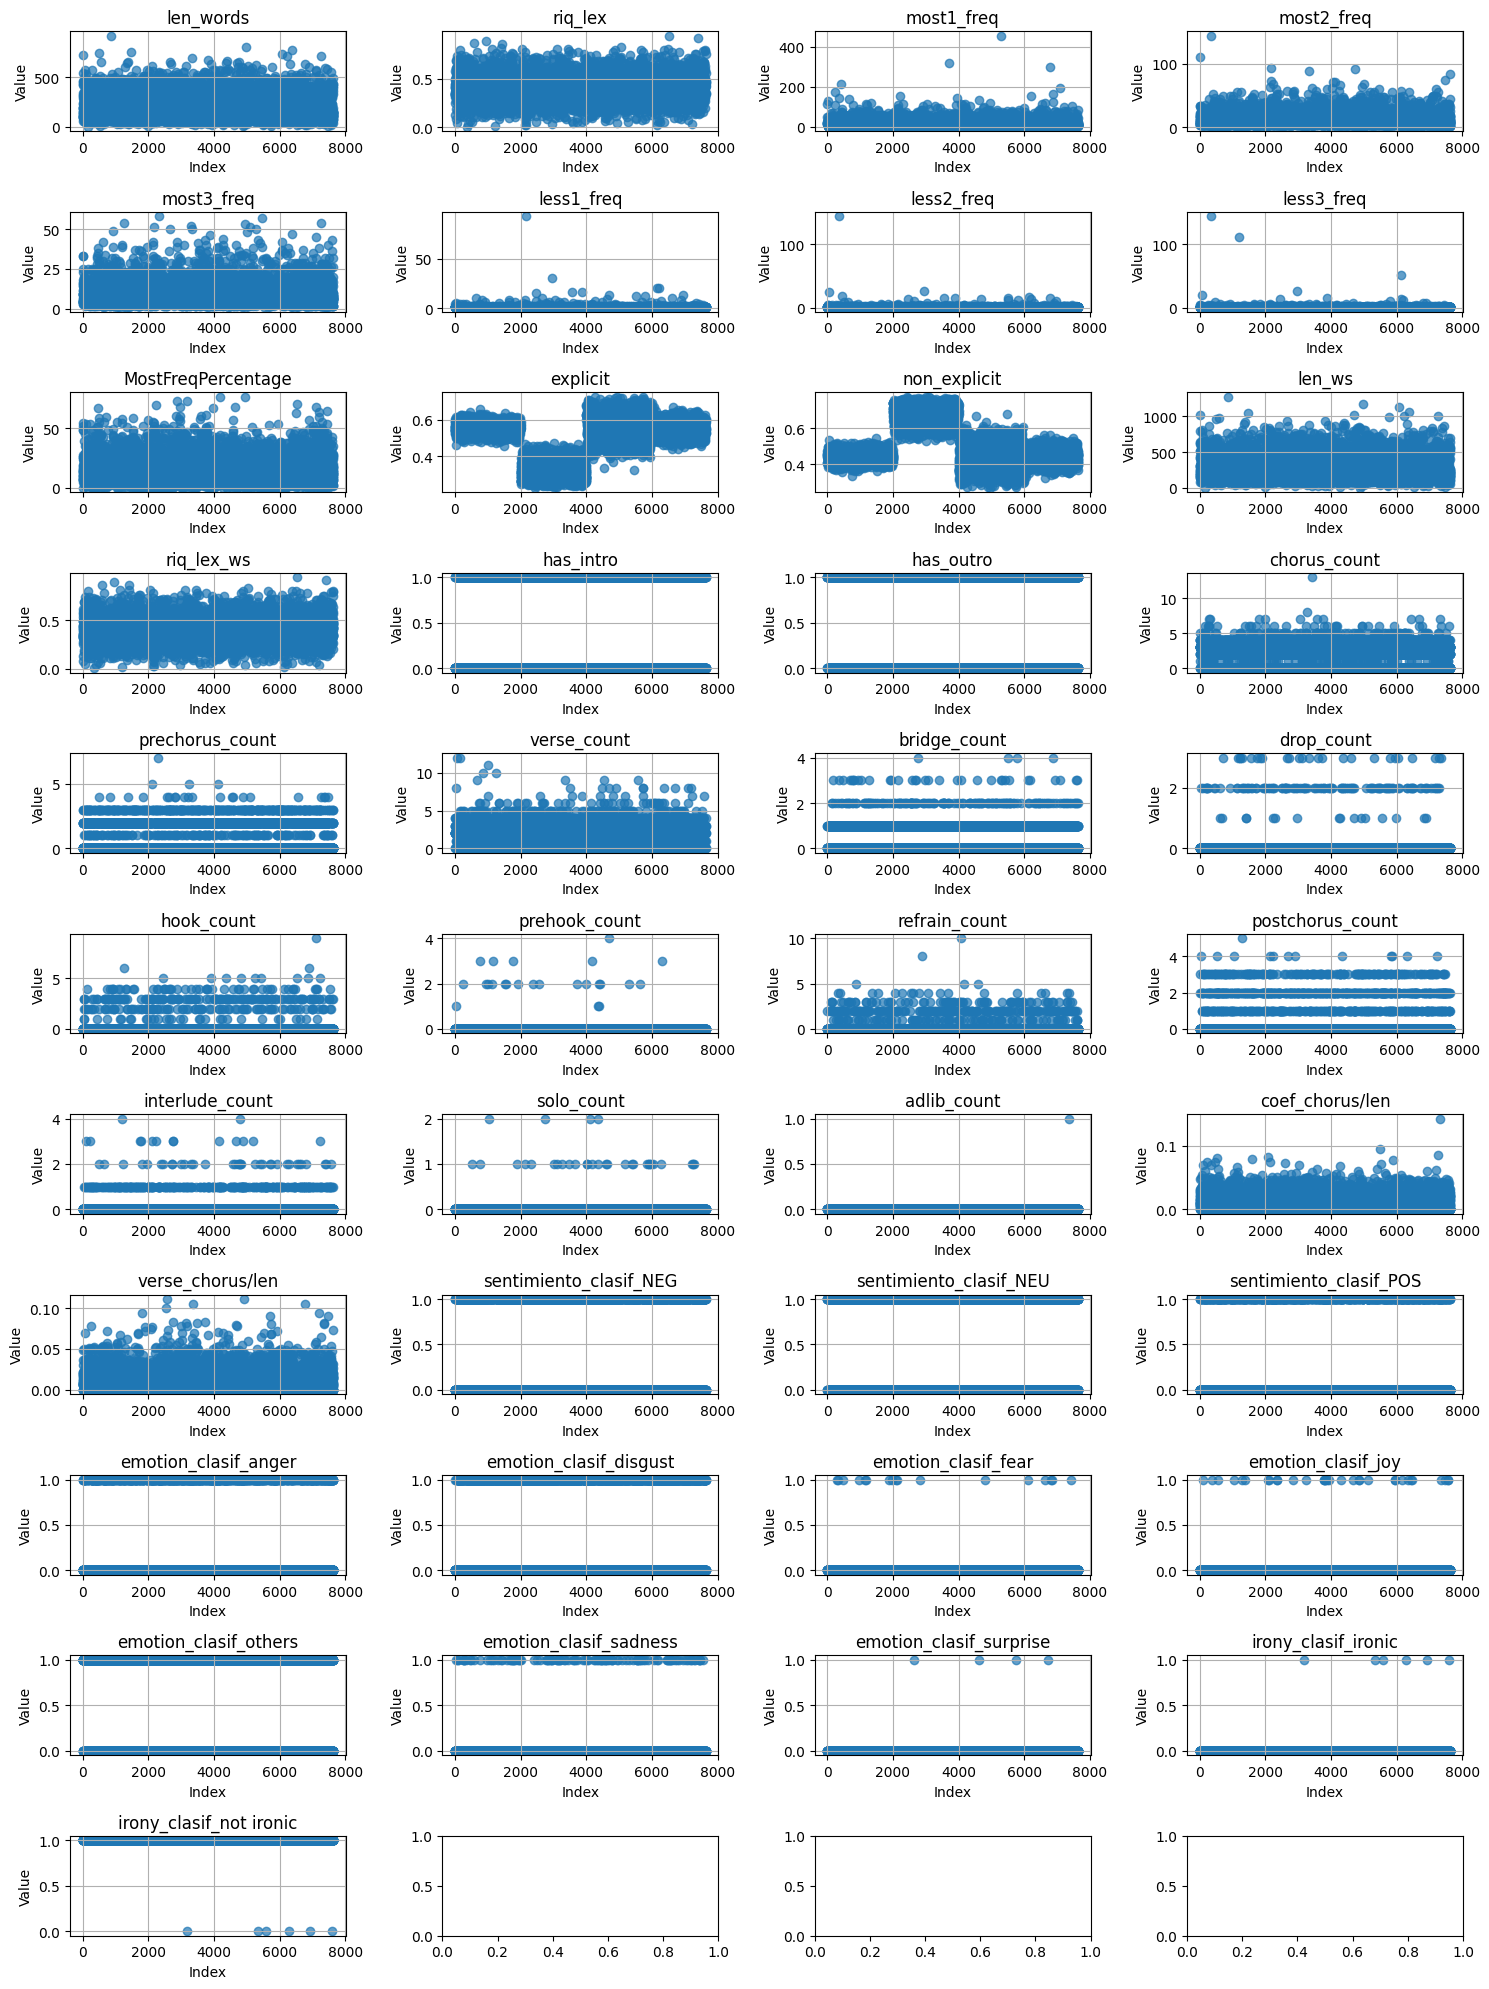

In [ ]:
# Create subplots for scatterplots
fig, axes = plt.subplots(nrows=round(len(num_col) / 4)+1, ncols=4, figsize=(15, 20))

# Flatten the axes for iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(num_col):
    ax = axes[i]
    ax.scatter(x=df_lyrics.index, y=df_lyrics[column], alpha=0.7)
    ax.set_title(column)
    ax.set_ylabel('Value')
    ax.set_xlabel('Index')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# BOXPLOTS

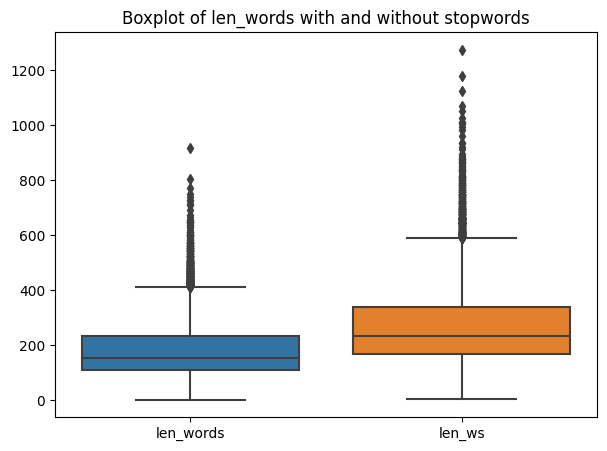

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(df_lyrics[['len_words', 'len_ws']], ax=ax)
plt.title('Boxplot of len_words with and without stopwords')
plt.show()

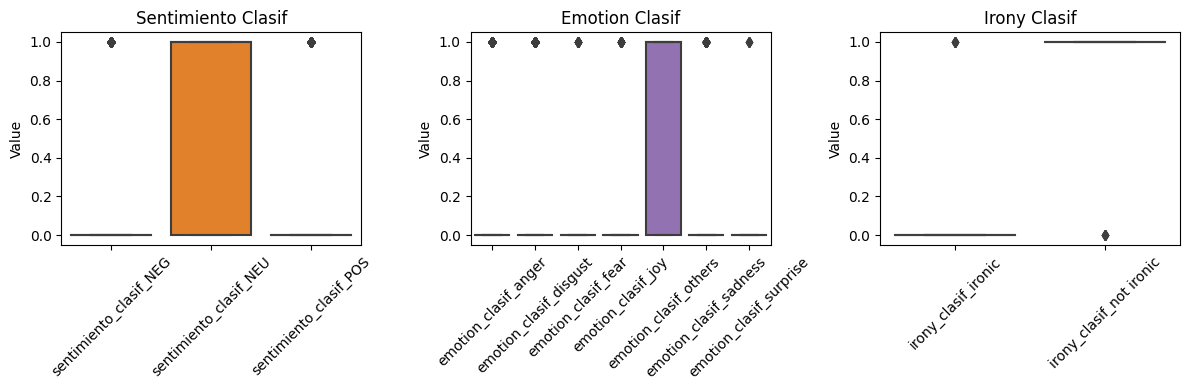

In [ ]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot boxplots for the specified columns in each subplot
sns.boxplot(df_lyrics[['sentimiento_clasif_NEG', 'sentimiento_clasif_NEU', 'sentimiento_clasif_POS']], ax=axes[0])
axes[0].set_title('Sentimiento Clasif')
axes[0].set_ylabel('Value')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(df_lyrics[['emotion_clasif_anger', 'emotion_clasif_disgust', 'emotion_clasif_fear', 'emotion_clasif_joy', 'emotion_clasif_others', 'emotion_clasif_sadness', 'emotion_clasif_surprise']], ax=axes[1])
axes[1].set_title('Emotion Clasif')
axes[1].set_ylabel('Value')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.boxplot(df_lyrics[['irony_clasif_ironic', 'irony_clasif_not ironic']], ax=axes[2])
axes[2].set_title('Irony Clasif')
axes[2].set_ylabel('Value')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


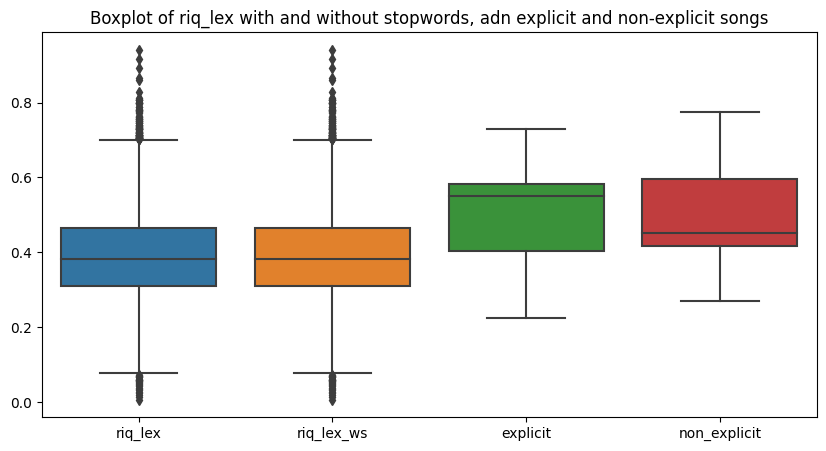

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(df_lyrics[['riq_lex', 'riq_lex_ws', 'explicit', 'non_explicit']], ax=ax)
plt.title('Boxplot of riq_lex with and without stopwords, and explicit and non-explicit songs')
plt.show()

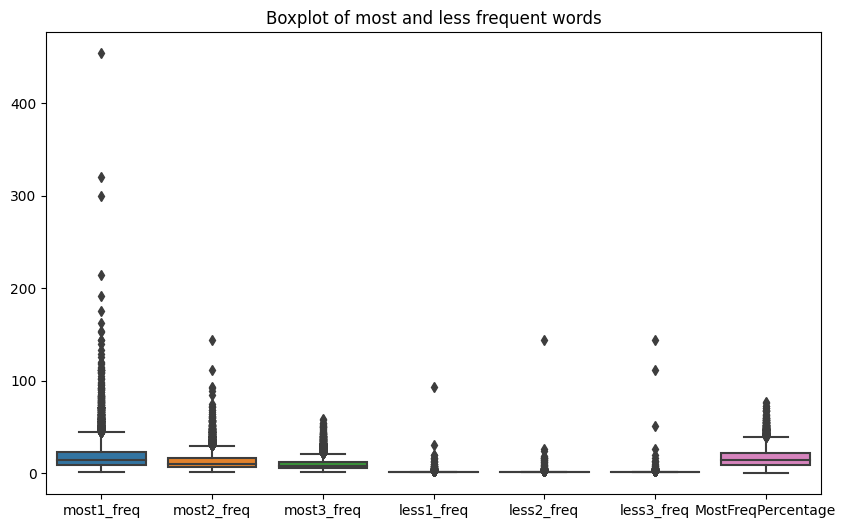

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df_lyrics[['most1_freq', 'most2_freq', 'most3_freq', 'less1_freq', 'less2_freq', 'less3_freq', 'MostFreqPercentage']])
plt.title('Boxplot of most and less frequent words')
plt.show()

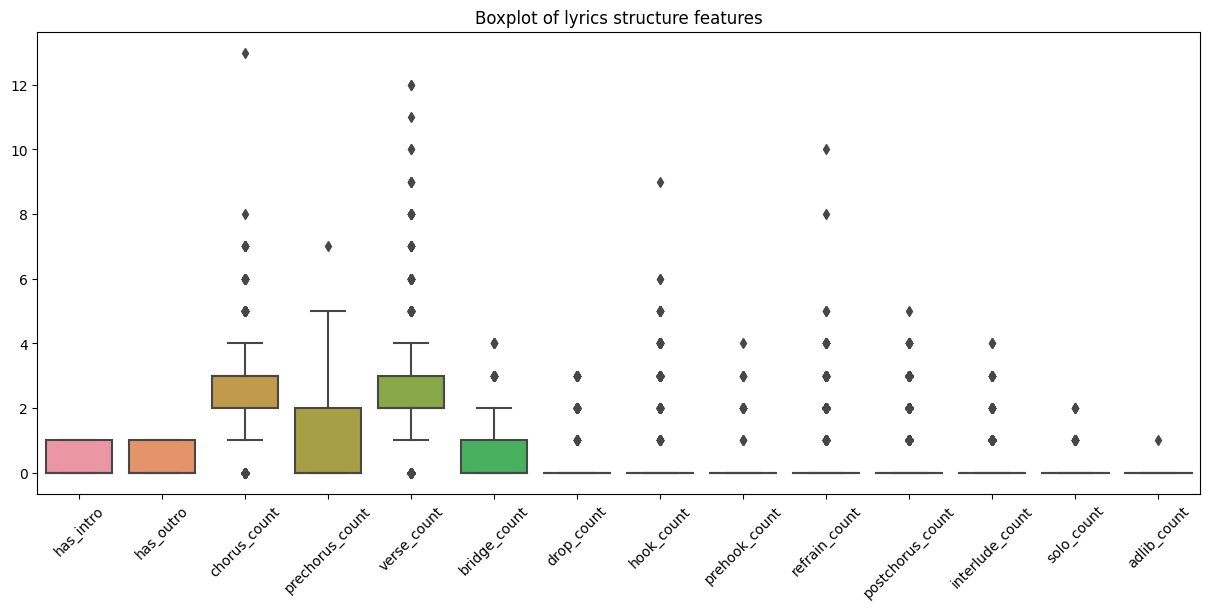

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(df_lyrics[['has_intro', 'has_outro',
       'chorus_count', 'prechorus_count', 'verse_count', 'bridge_count',
       'drop_count', 'hook_count', 'prehook_count', 'refrain_count',
       'postchorus_count', 'interlude_count', 'solo_count', 'adlib_count']])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.title('Boxplot of lyrics structure features')
plt.show()

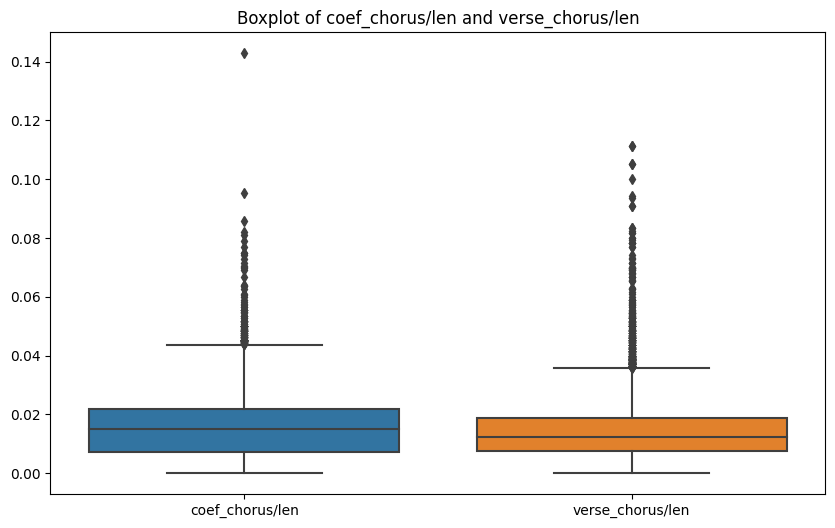

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df_lyrics[['coef_chorus/len', 'verse_chorus/len']])
plt.title('Boxplot of coef_chorus/len and verse_chorus/len')
plt.show()


# HISTOGRAMAS

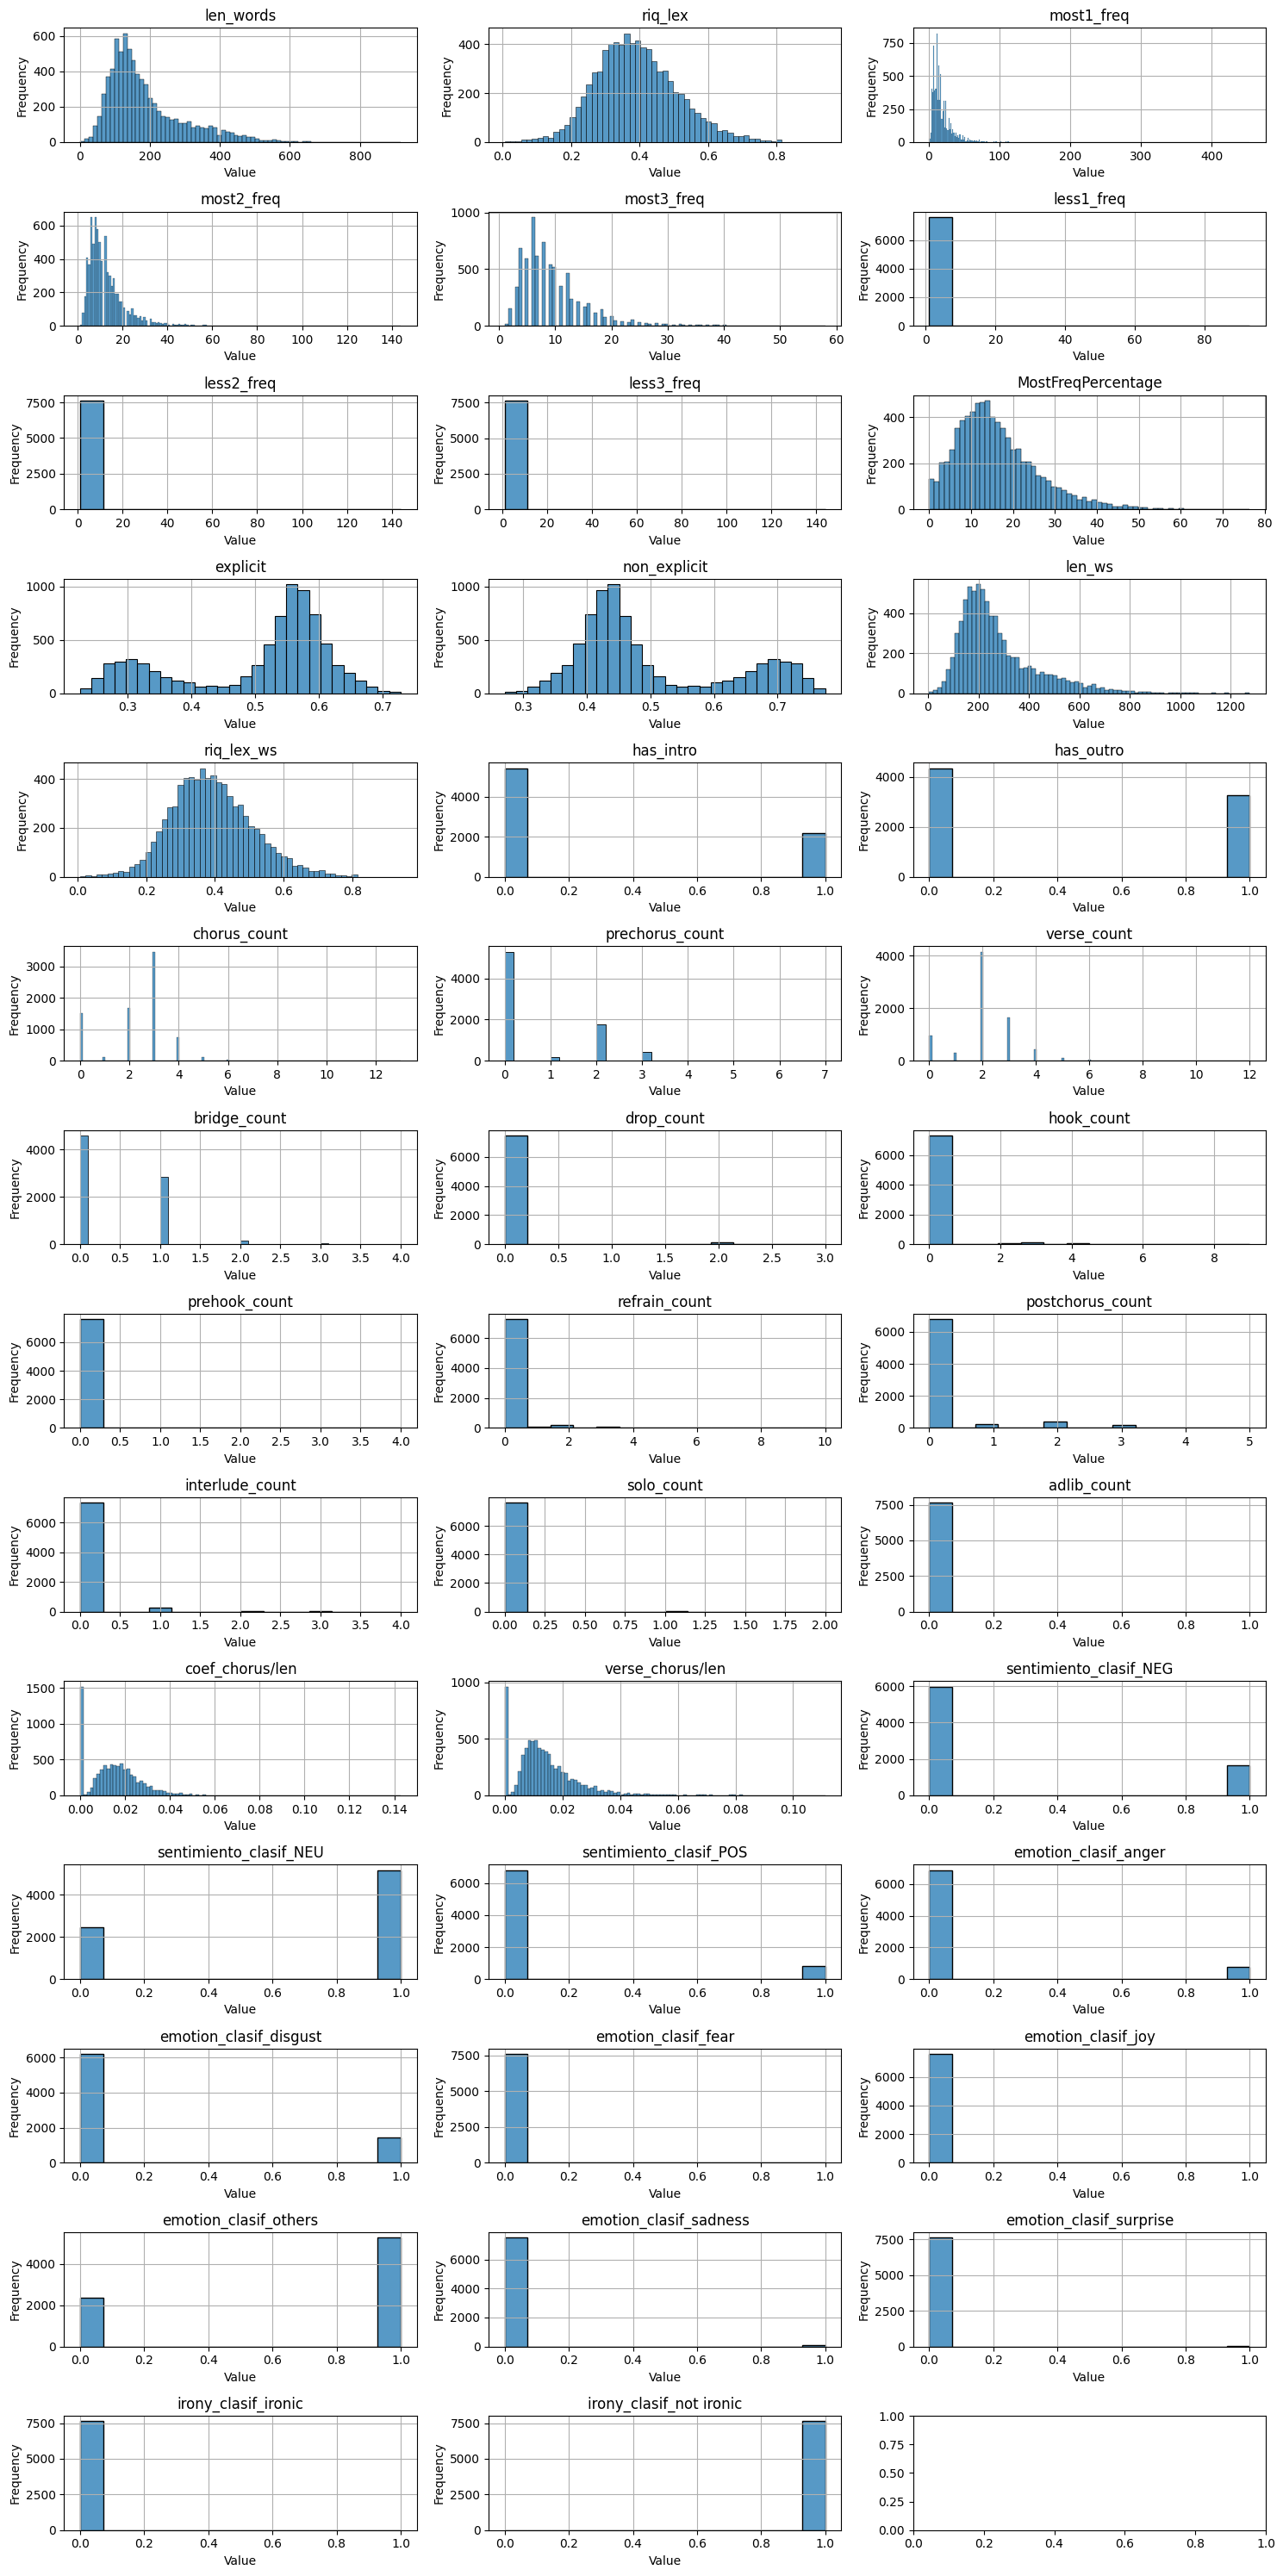

In [ ]:
# Create subplots for histograms
fig, axes = plt.subplots(nrows=(len(num_col)// 3)+1, ncols=3, figsize=(15, 30))

# Flatten the axes for iteration
axes = axes.flatten()

# Plot histograms for each numerical column
for i, column in enumerate(num_col):
    ax = axes[i]
    sns.histplot(df_lyrics[column], ax=ax)
    ax.set_title(column)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# WORDCLOUD

LYRICS TOTAL

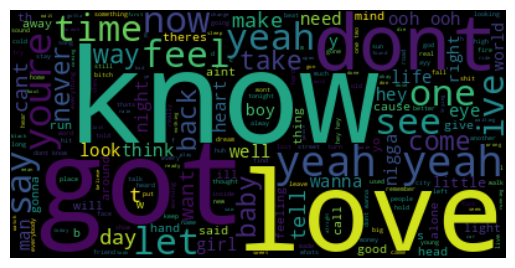

In [ ]:
#CLEAN LYRICS TOTAL

text = df_lyrics['clean_lyrics'].to_string()

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

MOST AND LESS FREQUENT WORDS

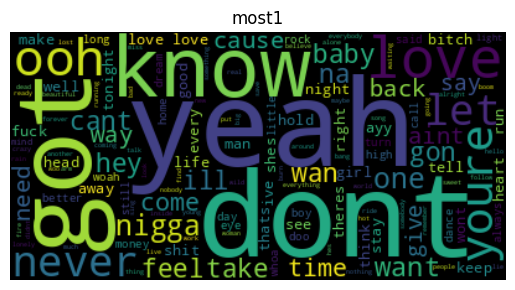

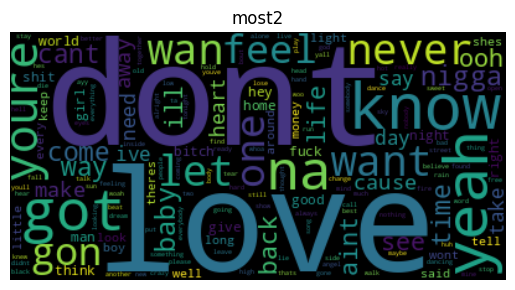

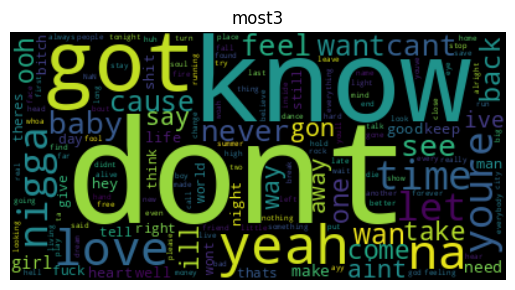

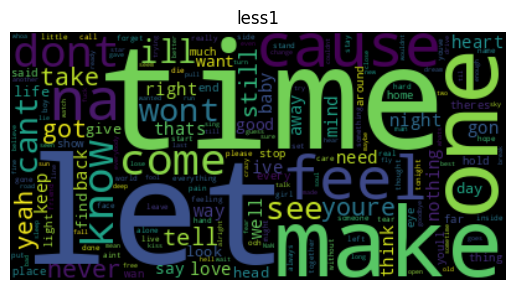

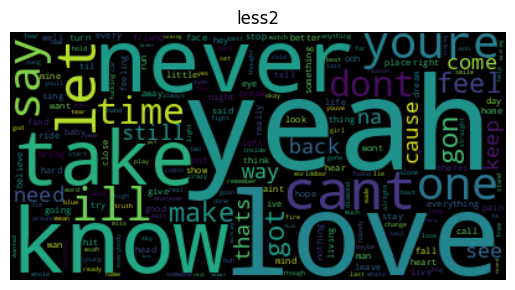

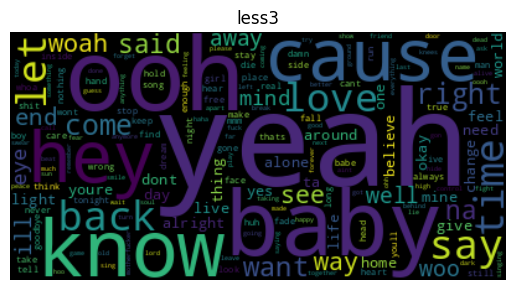

In [ ]:
freq_cols=['most1', 'most2', 'most3', 'less1', 'less2', 'less3']

for col in freq_cols:
    text = df_lyrics[col].to_string()

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(col)
    plt.show()

MOST TOTAL AND LESS TOTAL

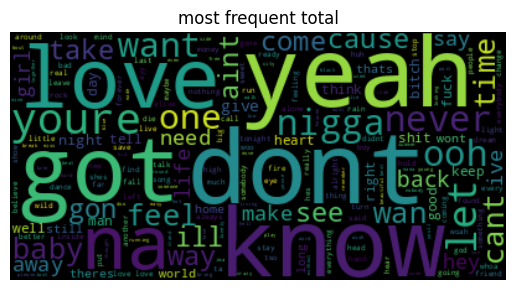

In [ ]:
text = df_lyrics['most1'].to_string()+df_lyrics['most2'].to_string()+df_lyrics['most3'].to_string()

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('most frequent total')
plt.show()

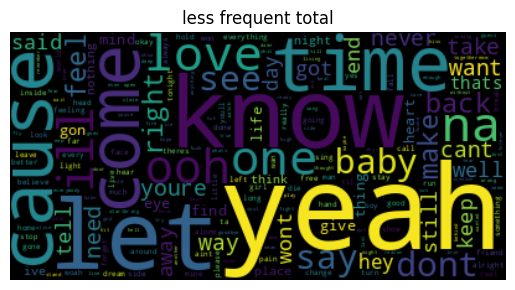

In [ ]:
text= df_lyrics['less1'].to_string()+df_lyrics['less2'].to_string()+df_lyrics['less3'].to_string()
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('less frequent total')
plt.show()

Una vez hecha la exploración, quitamos variables muy desbalanceadas o que no tienen utilidad para crear el dataframe de lyrics final que unir al resto de variables

In [ ]:
df_lyrics.columns

Index(['clean_lyrics', 'len_words', 'riq_lex', 'most1', 'most1_freq', 'most2',
       'most2_freq', 'most3', 'most3_freq', 'less1', 'less1_freq', 'less2',
       'less2_freq', 'less3', 'less3_freq', 'len_ws', 'riq_lex_ws',
       'MostFreqPercentage', 'explicit', 'non_explicit', 'has_intro',
       'has_outro', 'chorus_count', 'prechorus_count', 'verse_count',
       'bridge_count', 'drop_count', 'hook_count', 'prehook_count',
       'refrain_count', 'postchorus_count', 'interlude_count', 'solo_count',
       'adlib_count', 'coef_chorus/len', 'verse_chorus/len',
       'sentimiento_clasif_NEG', 'sentimiento_clasif_NEU',
       'sentimiento_clasif_POS', 'emotion_clasif_anger',
       'emotion_clasif_disgust', 'emotion_clasif_fear', 'emotion_clasif_joy',
       'emotion_clasif_others', 'emotion_clasif_sadness',
       'emotion_clasif_surprise', 'irony_clasif_ironic',
       'irony_clasif_not ironic'],
      dtype='object')

In [ ]:
df_lyrics_final=df_lyrics.drop(['bridge_count',
       'drop_count', 'hook_count', 'prehook_count', 'refrain_count',
       'postchorus_count', 'interlude_count', 'solo_count', 'adlib_count','sentimiento_clasif_NEG', 'sentimiento_clasif_NEU',
       'sentimiento_clasif_POS', 'emotion_clasif_anger',
       'emotion_clasif_disgust', 'emotion_clasif_fear', 'emotion_clasif_joy',
       'emotion_clasif_others', 'emotion_clasif_sadness',
       'emotion_clasif_surprise', 'irony_clasif_ironic',
       'irony_clasif_not ironic' ], axis=1)

In [ ]:
df_lyrics_final.columns

Index(['clean_lyrics', 'len_words', 'riq_lex', 'most1', 'most1_freq', 'most2',
       'most2_freq', 'most3', 'most3_freq', 'less1', 'less1_freq', 'less2',
       'less2_freq', 'less3', 'less3_freq', 'len_ws', 'riq_lex_ws',
       'MostFreqPercentage', 'explicit', 'non_explicit', 'has_intro',
       'has_outro', 'chorus_count', 'prechorus_count', 'verse_count',
       'coef_chorus/len', 'verse_chorus/len'],
      dtype='object')

# Complete lyrics dataframe

In [ ]:
df_lyrics_final.to_csv('/content/drive/MyDrive/df_lyrics.csv', index=False)